In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
model_to_index = {
    'falcon-40b': 0,
    'falcon-40b-lang-1': 1,
    'falcon-40b-lang-10': 2,
    'falcon-40b-lang-45': 3,
    'falcon-7b': 4,
    'falcon-7b-lang-1': 5,
    'falcon-7b-lang-2': 6,
    'falcon-7b-lang-3': 7,
    'falcon-7b-lang-5': 8,
    'falcon-7b-lang-10': 9,
    'falcon-7b-lang-20': 10,
    'falcon-7b-lang-45': 11
}

model_to_color = {
    'falcon-40b': 'gray',
    'falcon-40b-lang-1': 'gray',
    'falcon-40b-lang-10': 'gray',
    'falcon-40b-lang-45': 'gray',
    'falcon-7b': 'g',
    'falcon-7b-lang-1': 'g',
    'falcon-7b-lang-2': 'g',
    'falcon-7b-lang-3': 'g',
    'falcon-7b-lang-5': 'g',
    'falcon-7b-lang-10': 'g',
    'falcon-7b-lang-20': 'g',
    'falcon-7b-lang-45': 'g'
}

### Check NLU Per Dataset

In [87]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model or 'lang' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['model_index'] = model_to_index[model]
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [88]:
df.shape, df.dropna().shape

((110, 16), (110, 16))

In [89]:
df = df.dropna()

In [90]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
falcon-40b-lang-1,eng,50.094276,38.912920,38.979938
falcon-40b-lang-10,eng,49.110702,36.781138,37.534972
falcon-40b-lang-45,eng,51.725701,42.208279,43.425514
falcon-7b-lang-1,eng,48.996261,37.128784,37.653661
falcon-7b-lang-10,eng,48.929519,36.843951,37.223185
falcon-7b-lang-2,eng,50.709550,38.958110,40.054398
falcon-7b-lang-20,eng,51.302095,37.862413,38.932576
falcon-7b-lang-3,eng,49.335325,37.266134,37.583319
falcon-7b-lang-45,eng,50.319437,40.554489,40.901181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


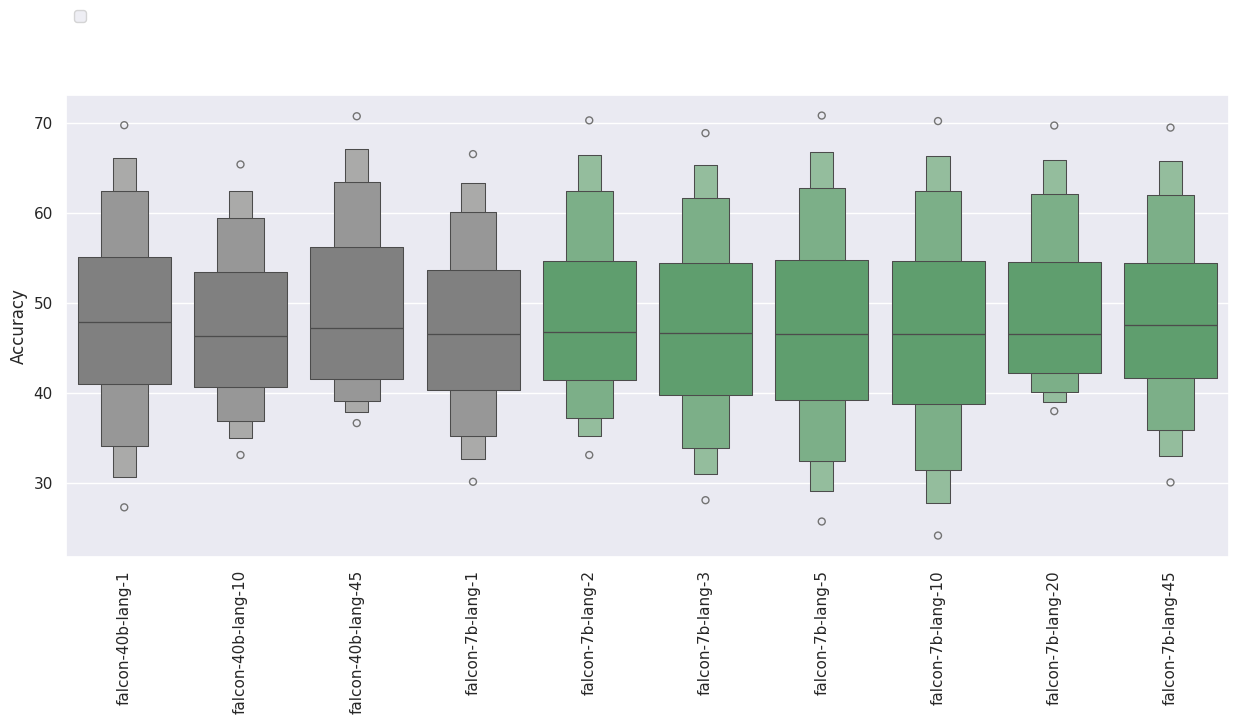

In [92]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
# pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


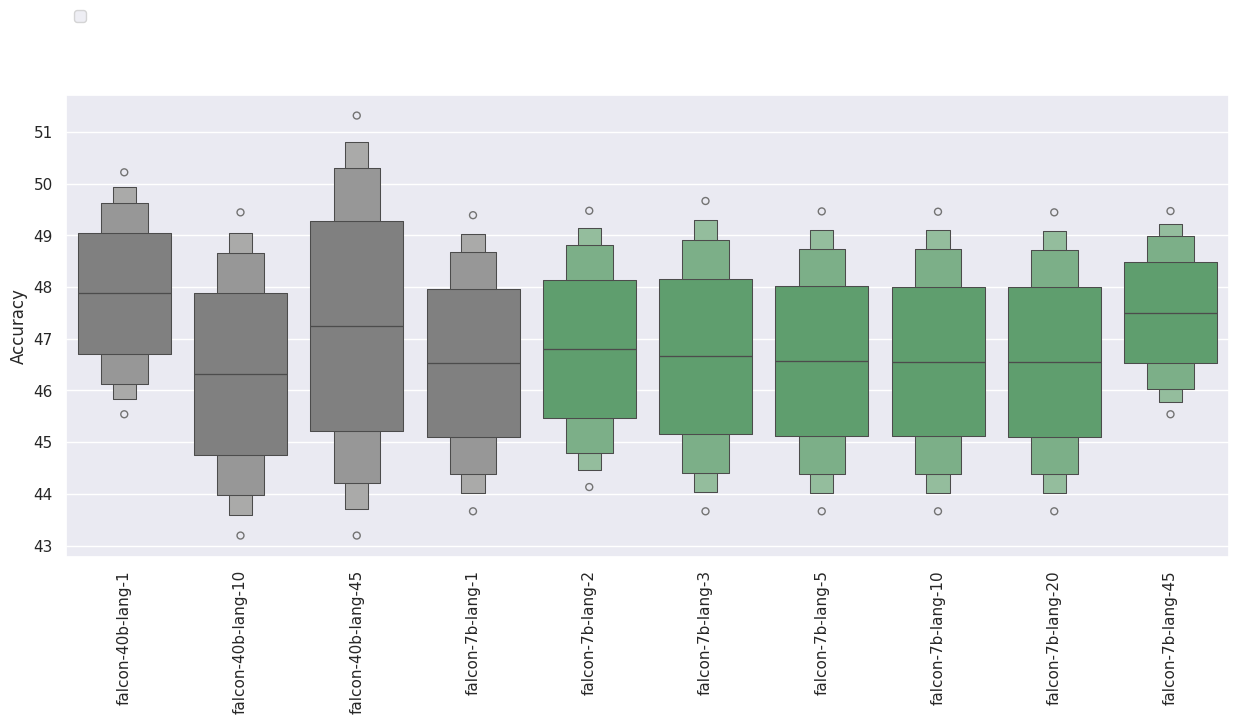

In [93]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.loc[df['dataset'].str.contains('nli')].groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
# pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

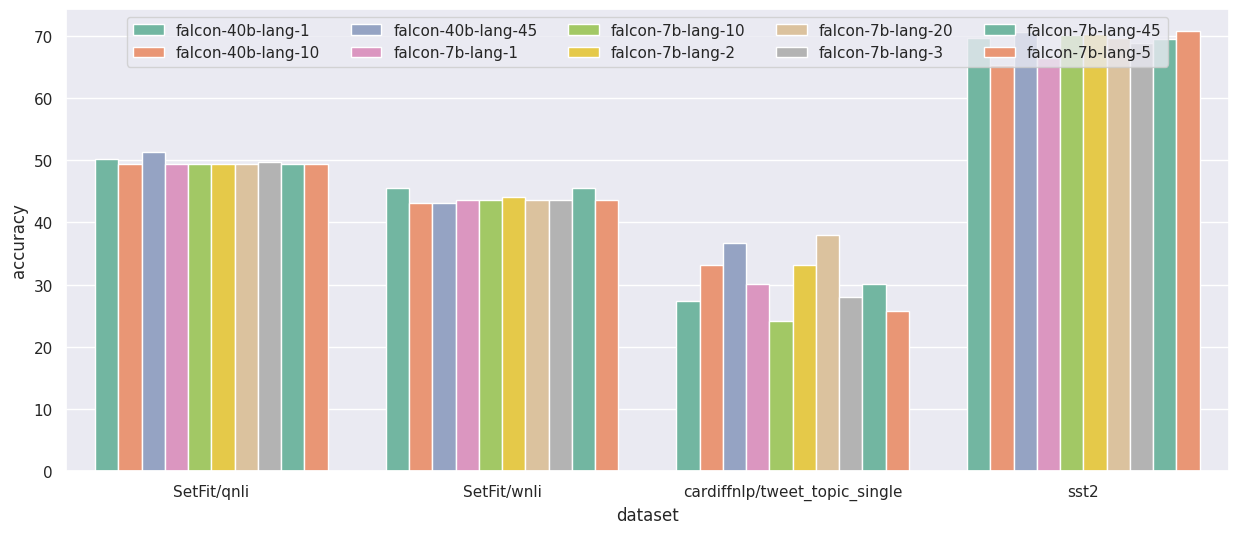

In [95]:
pdf = df.sort_values('model_index').groupby(['dataset', 'model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.show()

### Check ChatGPT Eval

In [113]:
dfs = []
for path in glob.glob('metrics_chatgpt_eval/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model or 'lang' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df = df.loc[df['dataset'] != 'ecare',:]
    
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['model_index'] = model_to_index[model]
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [114]:
df.shape, df.dropna().shape

((130, 16), (0, 16))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


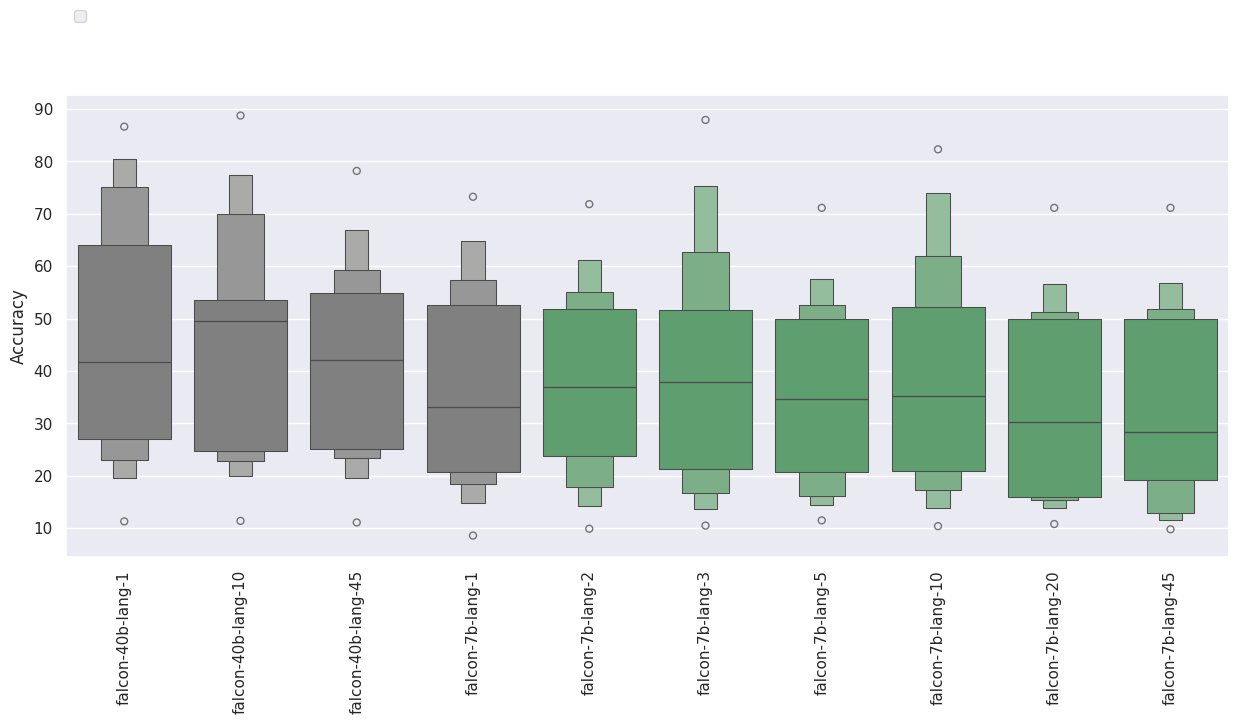

In [115]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model'])[['accuracy']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


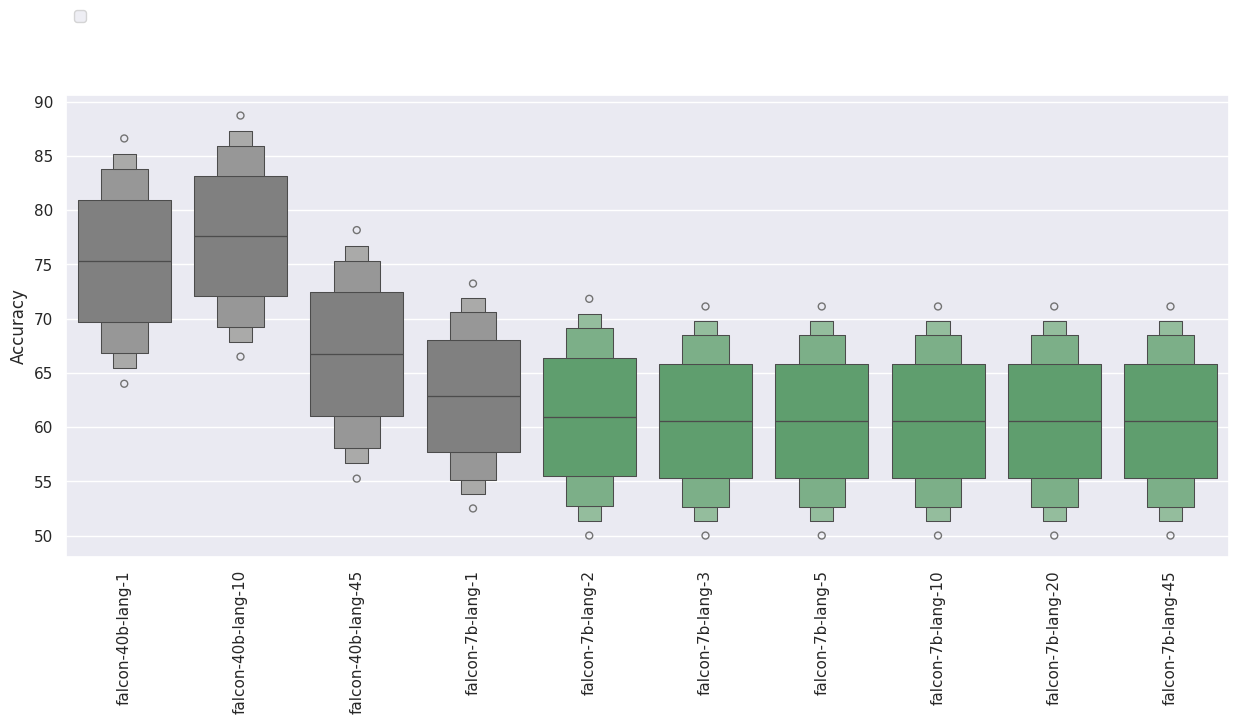

In [116]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.loc[df['dataset'].str.contains('covid')].groupby(['dataset', 'model'])[['accuracy']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


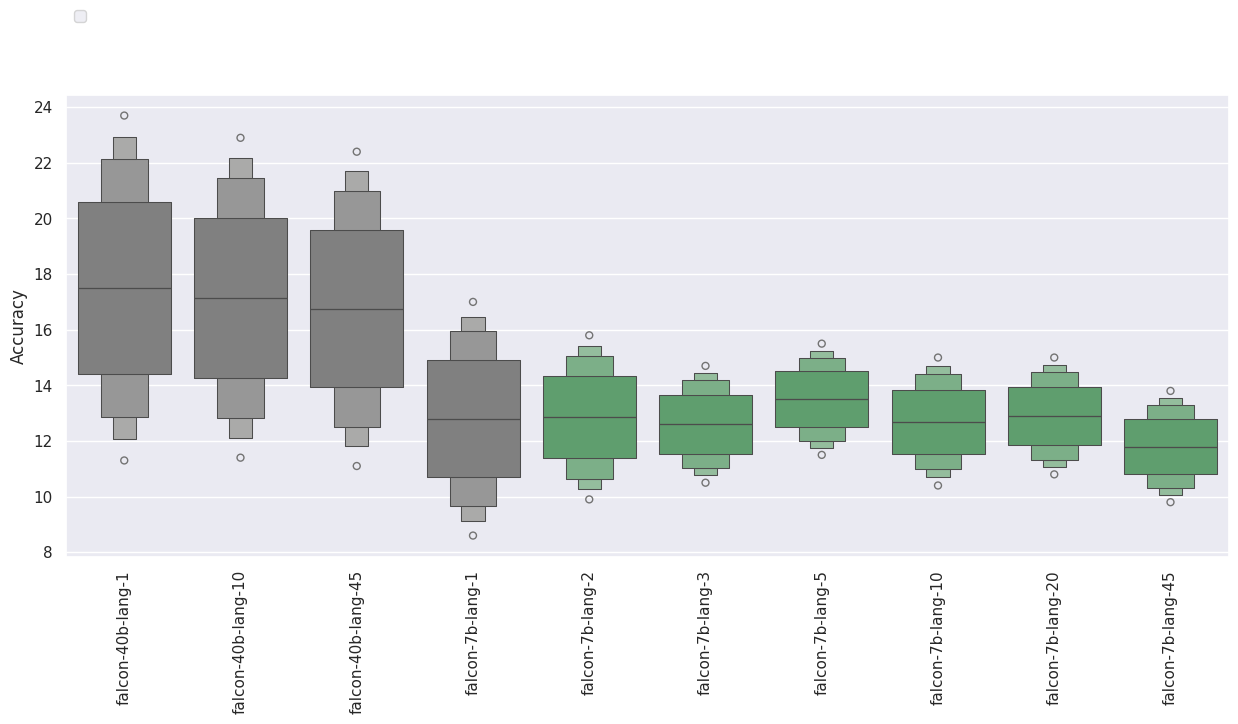

In [117]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.loc[df['dataset'].str.contains('step')].groupby(['dataset', 'model'])[['accuracy']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


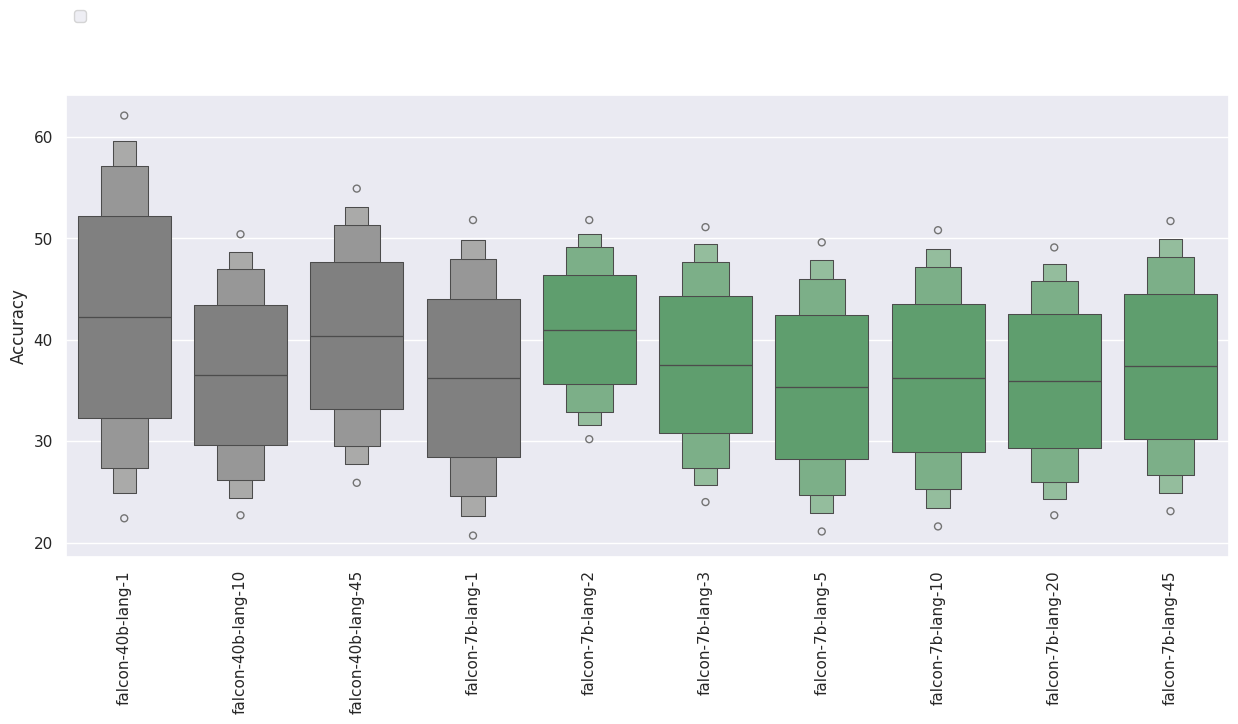

In [118]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.loc[df['dataset'].str.contains('babi')].groupby(['dataset', 'model'])[['accuracy']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


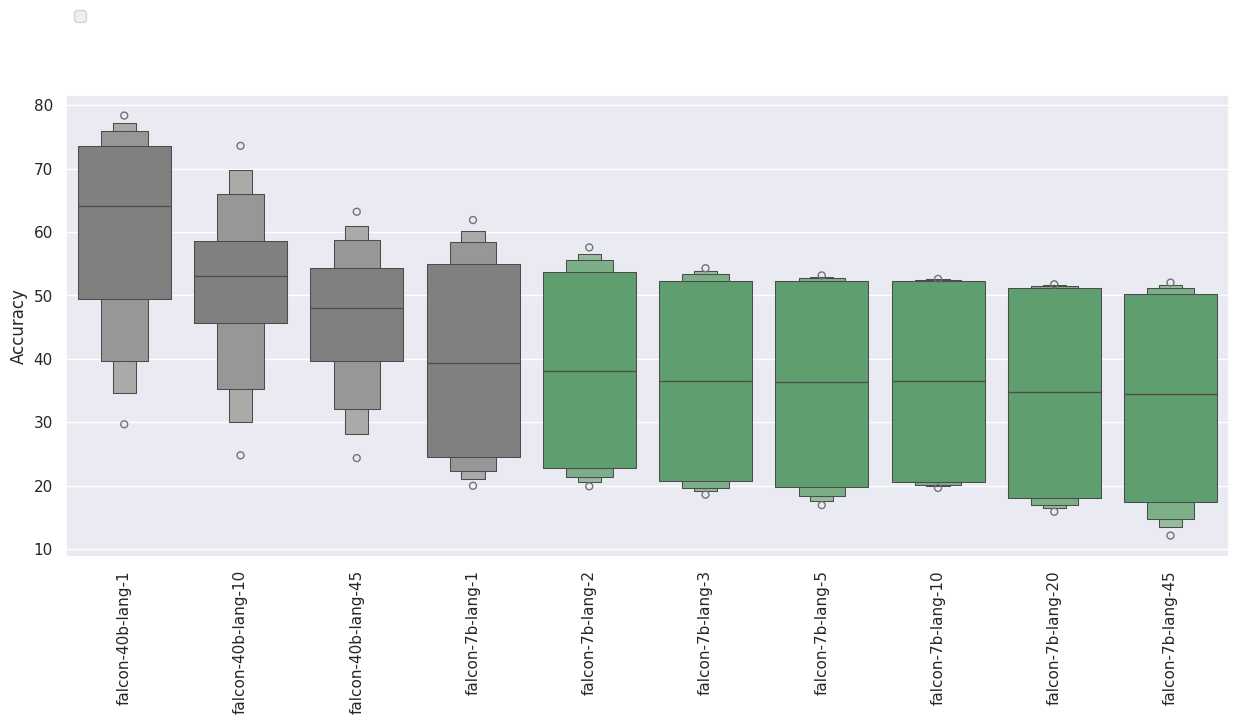

In [119]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.loc[df['dataset'].isin(['pep_3k', 'alpha_nli', 'clutrr', 'commonsenseqa'])].groupby(['dataset', 'model'])[['accuracy']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

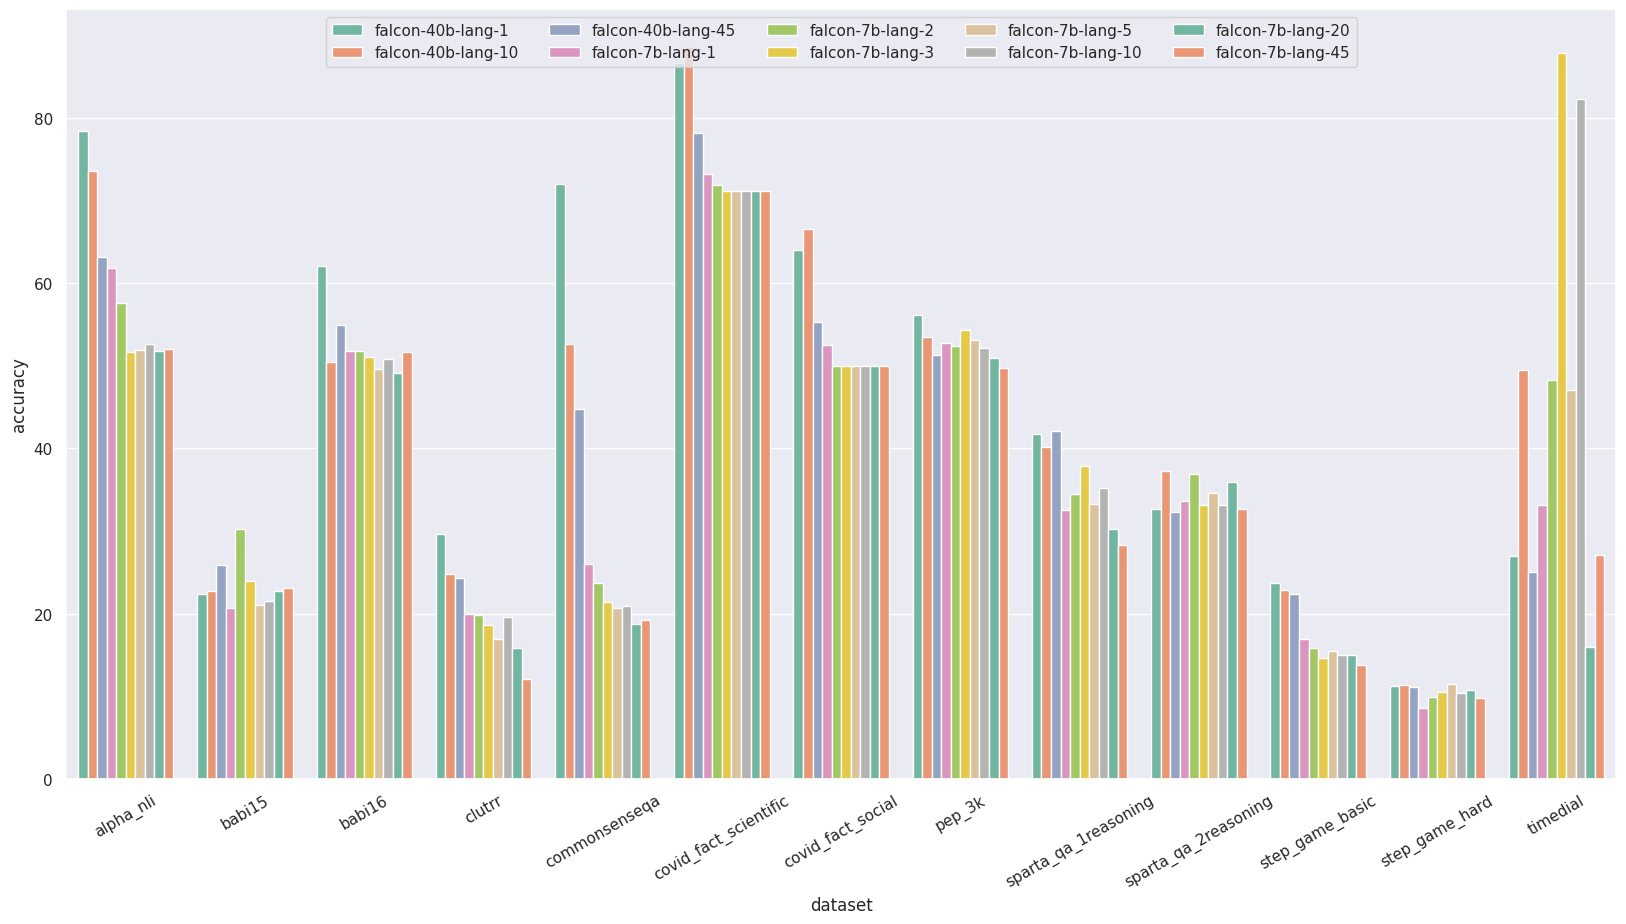

In [124]:
sns.set(rc={'figure.figsize':(20,10)})
pdf = df.sort_values('model_index').groupby(['dataset','model_index','model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.xticks(rotation=30)
plt.show()

### Check MMLU

In [12]:
dfs = []
for path in glob.glob('results/results_falcon*/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [27]:
df = pd.read_csv('results/results_falcon-7b-baseline/abstract_algebra.csv')
n_correct = df.iloc[:,6].sum() 
n_rows = df.shape[0] 
acc = n_correct / n_rows
n_correct, n_rows, acc

(30, 100, 0.3)

In [34]:
mmlu_cat_df = pd.read_csv('mmlu_category.csv')
mmlu_cat_df = mmlu_cat_df.set_index('subject')

In [125]:
data = []
for path in glob.glob('results/results_falcon-*/*.csv'):
    if 'baseline' in path:
        continue
    model = path.split('results_')[1].split('/')[0]
    subject = path.split('/')[-1][:-4]
    category = mmlu_cat_df.loc[subject, 'category']
    model_index = model_to_index[model]
    
    # Get Level
    if 'high_school' in path:
        level = 'high_school'
    elif 'college' in path:
        level = 'college'
    elif 'professional' in path:
        level = 'professional'
    elif 'elementary' in path:
        level = 'elementary'
    else:
        level = 'other'
        
    # Compute Correctnesss & Accuracy
    df = pd.read_csv(path)
    num_correct = df.iloc[:,6].sum() 
    num_data = df.shape[0] 
    accuracy = num_correct / num_data
    
    data.append({
        'model': model, 'model_index': model_index, 'level': level, 'subject': subject, 'category': category, 
        'num_correct': n_correct, 'num_data': n_rows, 'accuracy': accuracy
    })

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

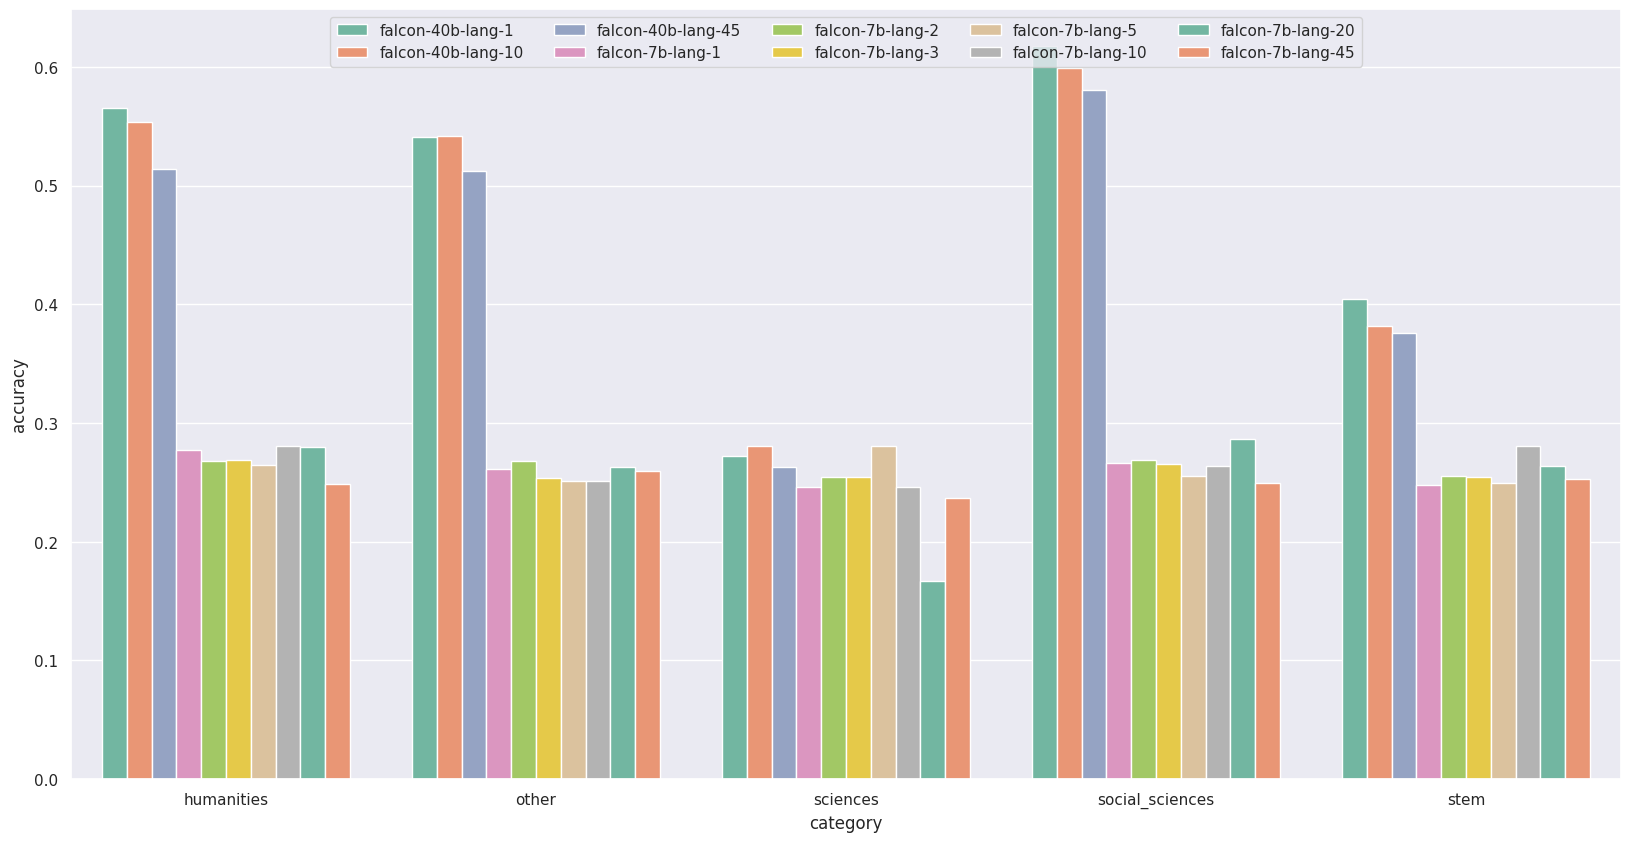

In [126]:
pdf = pd.DataFrame(data).sort_values('model_index').groupby(['category','model_index','model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='category', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

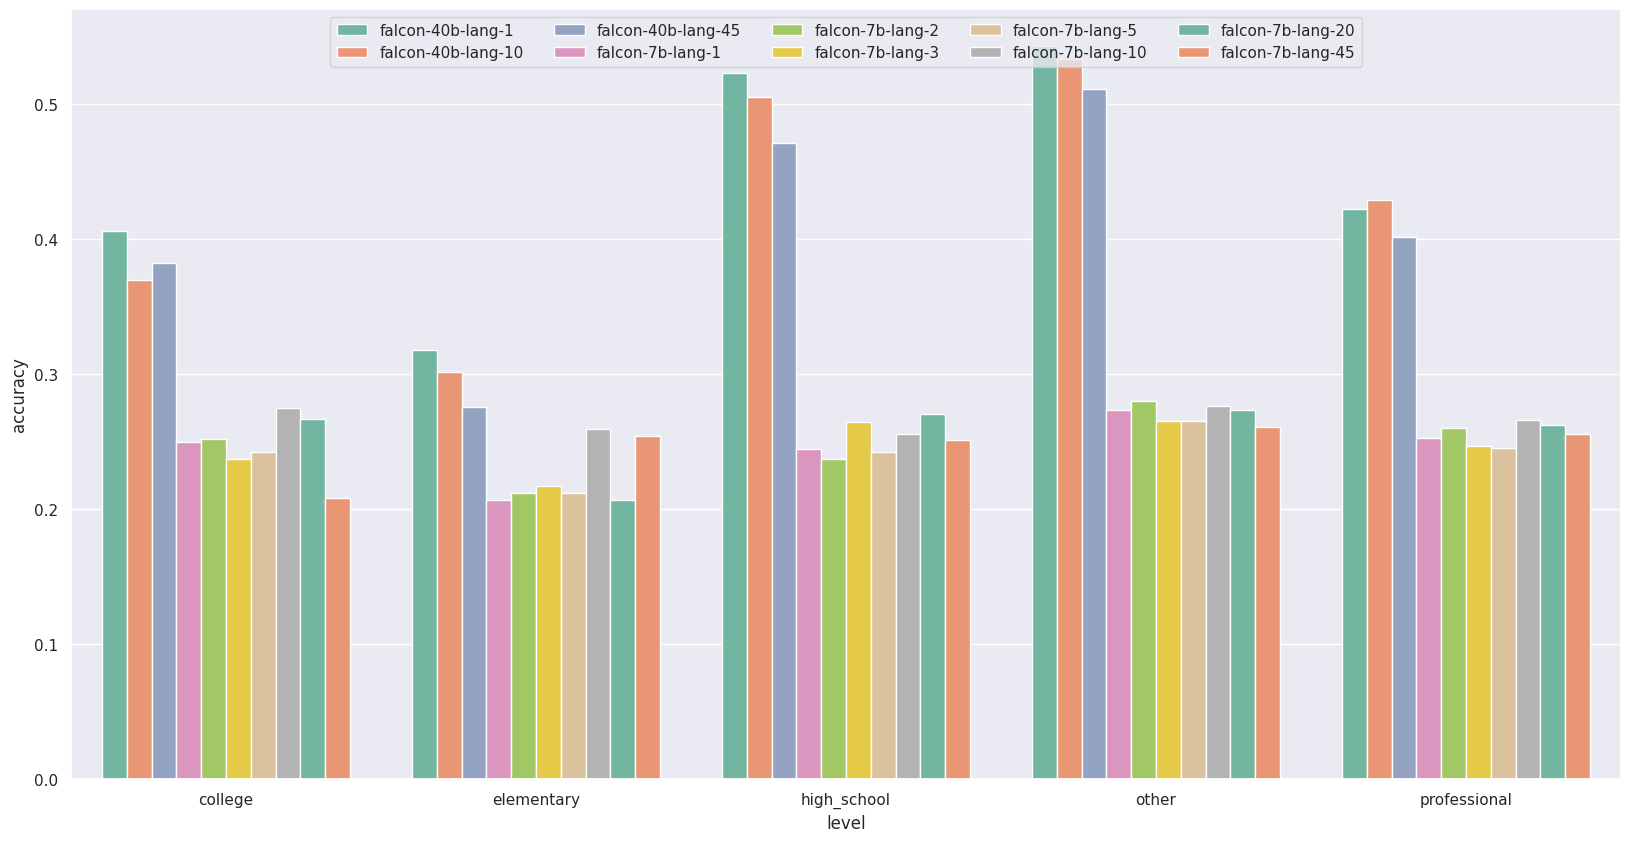

In [127]:
pdf = pd.DataFrame(data).sort_values('model_index').groupby(['level','model_index','model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='level', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.show()